In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
f=open('data/application_train.csv')
app_train = pd.read_csv(f)

In [2]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

(array([ 2539.,  7228.,  8085., 13924., 15014., 15829., 15140., 15022.,
        16993., 17186., 16601., 16157., 14686., 14059., 13192., 12763.,
        13523., 14188., 13203., 12517., 12202., 10540.,  9750.,  4580.,
         2590.]),
 array([20.51780822, 22.46191781, 24.4060274 , 26.35013699, 28.29424658,
        30.23835616, 32.18246575, 34.12657534, 36.07068493, 38.01479452,
        39.95890411, 41.9030137 , 43.84712329, 45.79123288, 47.73534247,
        49.67945205, 51.62356164, 53.56767123, 55.51178082, 57.45589041,
        59.4       , 61.34410959, 63.28821918, 65.23232877, 67.17643836,
        69.12054795]),
 <a list of 25 Patch objects>)

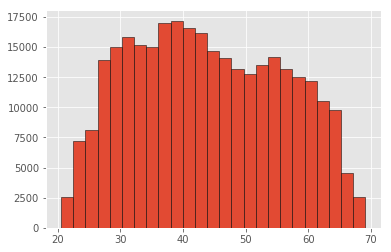

In [8]:
plt.style.use('ggplot') 
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)

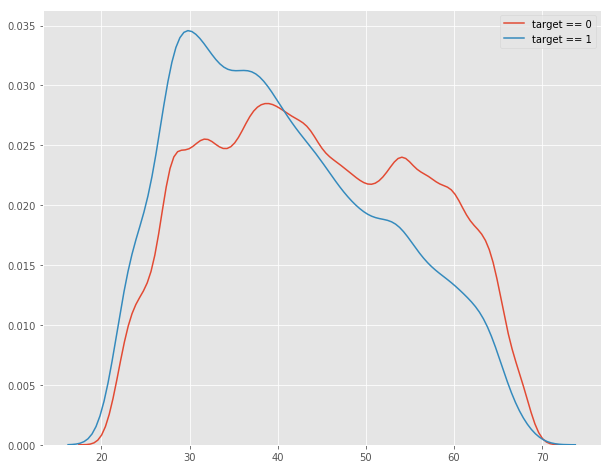

In [13]:
plt.figure(figsize = (10, 8))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

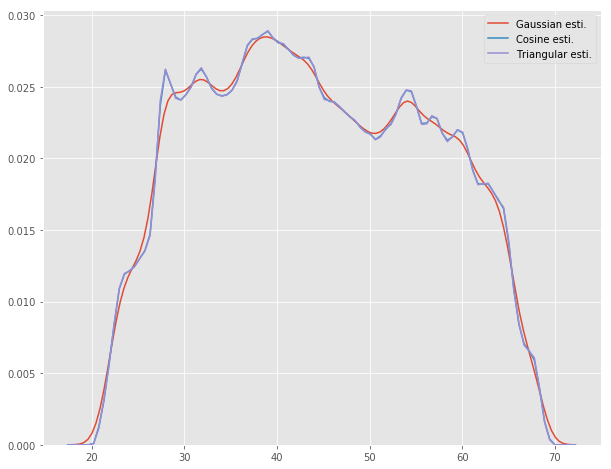

In [19]:
plt.figure(figsize = (10, 8))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Gaussian esti.', kernel='gau')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Cosine esti.', kernel='cos')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Triangular esti.', kernel='tri')

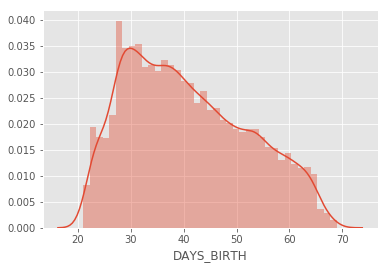

In [22]:
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
#plt.legend()

In [26]:
import warnings
warnings.filterwarnings('ignore')
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
age_data.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH
0,1,9461,25.920548
1,0,16765,45.931507
2,0,19046,52.180822
3,0,19005,52.068493
4,0,19932,54.608219


In [28]:
bin_cut =  [i for i in range(20,70,(70-20)//10)] + [70]
bin_cut

[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

In [29]:
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

In [31]:
age_data.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25, 30]"
1,0,16765,45.931507,"(45, 50]"
2,0,19046,52.180822,"(50, 55]"
3,0,19005,52.068493,"(50, 55]"
4,0,19932,54.608219,"(50, 55]"


In [35]:
age_data['YEARS_BINNED'].value_counts().sort_index().index

CategoricalIndex([(20, 25], (25, 30], (30, 35], (35, 40], (40, 45], (45, 50],
                  (50, 55], (55, 60], (60, 65], (65, 70]],
                 categories=[(20, 25], (25, 30], (30, 35], (35, 40], (40, 45], (45, 50], (50, 55], (55, 60], ...], ordered=True, dtype='category')

In [37]:
year_group_sorted=list(age_data['YEARS_BINNED'].value_counts().sort_index().index)

In [52]:
s=age_data['YEARS_BINNED'].value_counts().sort_index()

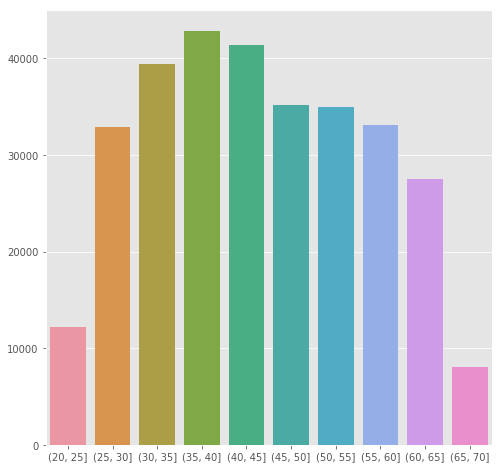

In [63]:
plt.figure(figsize = (8, 8))
px=s.values
py=s.index
sns.barplot(py, px)

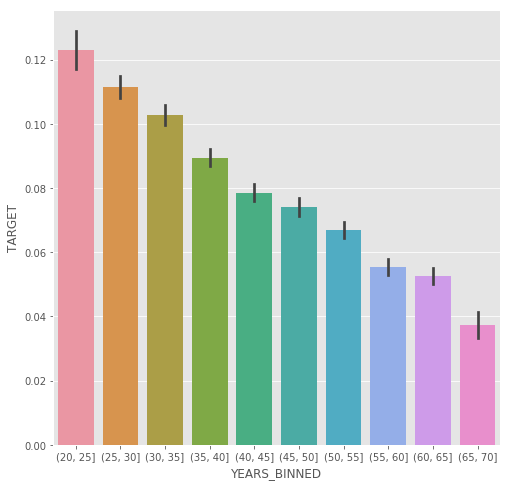

In [69]:

plt.figure(figsize = (8, 8))
px = age_data['YEARS_BINNED']
py = age_data['TARGET']
sns.barplot(px, py)

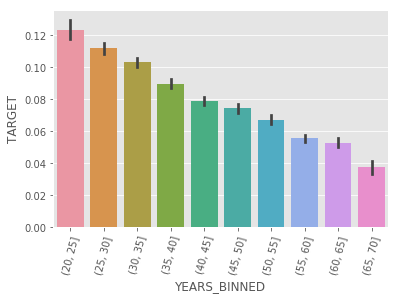

In [72]:
sns.barplot(px, py)
plt.xticks(rotation = 75)
plt.show()

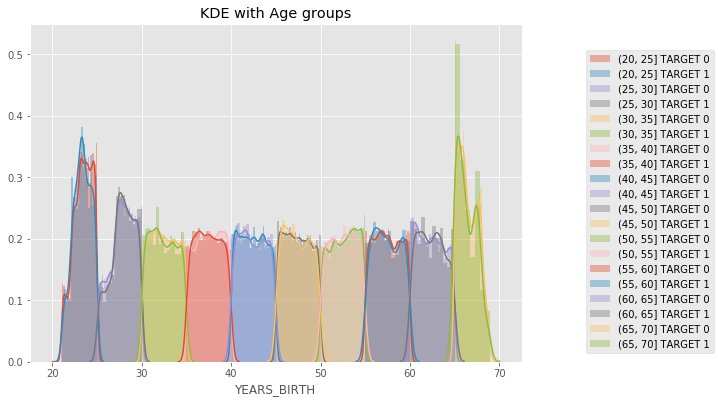

In [78]:
fig = plt.figure(figsize=(10,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i])+' TARGET 0')
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i])+' TARGET 1')
plt.title('KDE with Age groups')
fig.legend(loc='center right')
plt.tight_layout(rect=[0,0,0.75,0.95])
plt.show()